#### 6_RandomForest_Regressor.ipynb

## Random Forest Regressor (랜덤 포레스트 회귀)
- 여러 개의 결정 트리(Decision Tree)를 만들고, \
  각 트리의 예측값의 **평균**을 최종 예측값으로 사용하는 앙상블 모델
- 과적합(Overfitting)을 방지하고 예측 성능을 높이는 데 효과적임
- 데이터 스케일링이 필요 없음 (트리 기반 모델의 특징)

### *개념체크*
- 과적합(Overfitting) : 훈련 데이터에 너무 맞춰져서 노이즈까지 외워버린 상태. 새로운 데이터에서 성능이 떨어지는 현상.
- 노이즈(Noise) : 데이터에서 원래 패턴이 아닌 우연한 흔들림 또는 잡음. 예측과 상관없는 요소들이 섞여있는 상태를 의미함.
- 트리 모델에서 스케일링이 필요 없는 이유
  : 트리 모델은 거리나 크기 비교를 하지 않고,\
    특성 값을 기준으로 **데이터를 둘로 나누는 분기점(split point)** 만 찾기 때문에 특성 값의 크기가 달라도 모델 성능에 영향을 주지 않음

In [2]:
import numpy as np

# 샘플 데이터 => 선형 회귀 샘플 + 노이즈
x = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
y = np.array([5.2, 7.1, 8.8, 11.3, 13.0, 15.1, 17.2, 19.0])
# => y=2x+3 을 따르는 약한 선형 관계..!

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, random_state=42)
# * n_estimators : 랜덤 포레스트가 만들 트리 개수. 기본값 100.
#                  클수록 성능이 좋아지지만, 시간이 오래걸림.

model.fit(x, y)

y_pred = model.predict(x)

from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print('----- * Random Forest Regressor * -----')
print(f'r2 : {r2:.2f}')
print(f'mse :  {mse:.2f}')

----- * Random Forest Regressor * -----
r2 : 0.97
mse :  0.57


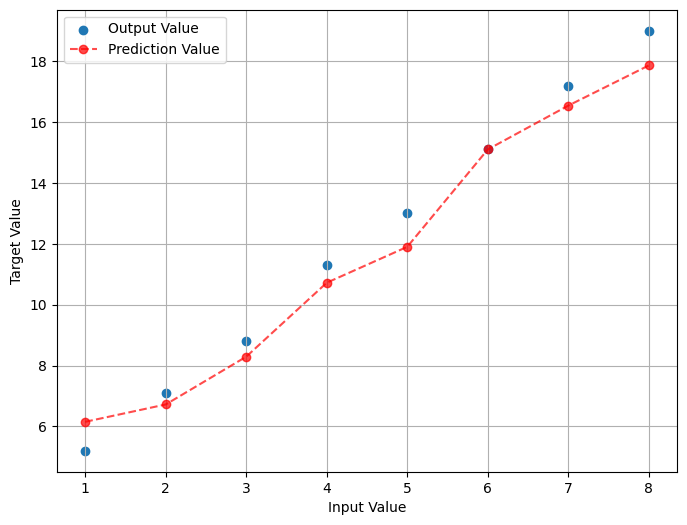

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(x, y, label='Output Value')
plt.plot(x, y_pred, color='red', marker='o', linestyle='--', alpha=0.7, label='Prediction Value')

plt.xlabel('Input Value')
plt.ylabel('Target Value')

plt.grid(True)
plt.legend()